In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn import datasets
import seaborn as sns
# from sklearn import cross_validation

In [4]:
# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

In [7]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

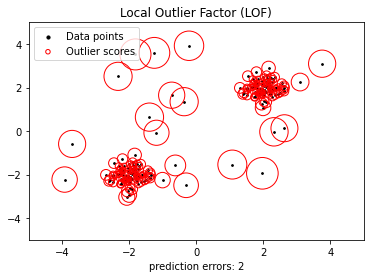

In [8]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

## TEST

In [38]:
df = pd.read_csv("datasets/haberman.csv")
df.head(2)

,age,op_year,lymph_nodes,survival
0,30,64,1,1
1,30,62,3,1


In [53]:
# add outlier
outlier = pd.DataFrame({'age':[484,168,150,145],'op_year':[20,516,614,14654],'lymph_nodes':[6848,6854,516,15],'survival':[1,1,1,1]})
df.append(outlier)
print()

In [54]:
X = df.iloc[:,:2]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

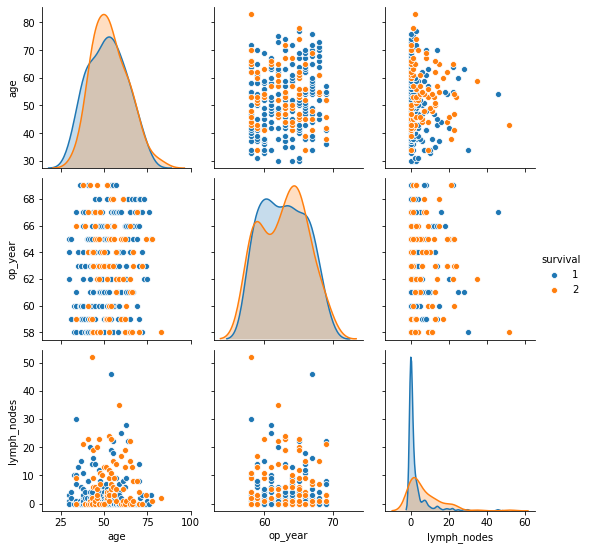

In [55]:
sns.pairplot(df, hue="survival")

In [56]:
clf1 = LocalOutlierFactor(n_neighbors=10).fit(X_train,y_train)
clf2 = KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)

y_pred1 = clf1.fit_predict(X_test)
y_pred2 = clf2.predict(X_test)

print(accuracy_score(y_test,y_pred1))
print(accuracy_score(y_test,y_pred2))

0.717391304347826
0.7282608695652174


ValueError: DataFrame constructor not properly called!